In [ ]:
# parsing GloVe word embeddings file

In [1]:
import os
from numpy import asarray

glove_dir = '../data'
embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.300d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [195]:
from pandas import read_pickle

df = read_pickle('../data/dataset_previo_final.pkl')
df = df[df.tweet_type =='original']

In [196]:
import os
from pandas import DataFrame, concat, read_csv
from numpy import isfinite

concat_df_labels = DataFrame()
cat_path = '../data/Categorizacion/'
for i in os.listdir(cat_path):
    print(cat_path + i)
    df_labels = read_csv(cat_path + i, sep=';', error_bad_lines=False)
    
    df_labels = df_labels[(df_labels['QUIEN'].astype(str) != '?')]
    df_labels['QUIEN'] = df_labels['QUIEN'].astype(float)
    
    df_labels['full_text'] = df_labels['full_text'].astype(str)
    
    df_labels['Asesinato'] = df_labels['Asesinato'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Violacion'] = df_labels['Violacion'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Agresion \nsexual'] = df_labels['Agresion \nsexual'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Maltrato'] = df_labels['Maltrato'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Acoso'] = df_labels['Acoso'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Miedo'] = df_labels['Miedo'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Asco\nTristeza\nRabia'] = df_labels['Asco\nTristeza\nRabia'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    
    df_labels = df_labels[['id','tweet_id', 'user_name', 'QUIEN', 'Asesinato', 'Violacion', 'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo', 'Asco\nTristeza\nRabia', 'full_text']]
    df_labels.set_index('id', inplace=True)
    df_labels = df_labels[isfinite(df_labels['QUIEN'])]
    
    concat_df_labels = concat([concat_df_labels, df_labels], axis=0)

../data/Categorizacion/Karma-Tabla 1.csv
../data/Categorizacion/Vicenc-Tabla 1.csv
../data/Categorizacion/Feliu-Tabla 1.csv
../data/Categorizacion/Laura-Tabla 1.csv
../data/Categorizacion/Diana-Tabla 1.csv
../data/Categorizacion/Sol-Tabla 1.csv
../data/Categorizacion/Camilo-Tabla 1.csv
../data/Categorizacion/Guillermo-Tabla 1.csv
../data/Categorizacion/Cristina-Tabla 1.csv
../data/Categorizacion/Carlos_G-Tabla 1.csv
../data/Categorizacion/Patricio-Tabla 1.csv
../data/Categorizacion/Luz-Tabla 1.csv
../data/Categorizacion/Maria-Tabla 1.csv
../data/Categorizacion/Juan-Tabla 1.csv
../data/Categorizacion/Irene-Tabla 1.csv
../data/Categorizacion/Fer-Tabla 1.csv
../data/Categorizacion/Carlos_C-Tabla 1.csv
../data/Categorizacion/Artur-Tabla 1.csv
../data/Categorizacion/Aniol-Tabla 1.csv
../data/Categorizacion/David-Tabla 1.csv


In [197]:
concat_df_labels.describe()

,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia
count,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000
mean,2.520004,0.038264,0.055313,0.111208,0.062676,0.141335,0.117214,0.190836
std,1.180093,0.191842,0.228602,0.314405,0.242390,0.348384,0.321691,0.392979
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
concat_df_labels.sample(5)

,tweet_id,user_name,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia,full_text
id,,,,,,,,,,,
9.912969e+17,"9,91E+17",Rocio,1.0,0,0,1,0,0,0,0,"Me quedé a dormir en lo de mi tia, estaba el m..."
9.902702e+17,"9,90E+17",Patalea,1.0,0,0,1,0,0,0,0,Recuerdo cuando en el instituto todos los chic...
9.909947e+17,"9,91E+17",Pablo Ciarmatori,3.0,0,0,0,0,0,0,1,#Cuentalo... Cuántas historias desgarradoras.
9.898234e+17,"9,90E+17",Commander Feminist De Insolente Color Rosita,1.0,0,0,1,0,0,0,0,"#Cuéntalo Hace unos años, en una discoteca, un..."
9.915219e+17,"9,92E+17",.,3.0,0,0,0,0,0,0,0,me encanta lo cagados de miedo que deben estar...


In [199]:
concat_df_labels.columns

Index(['tweet_id', 'user_name', 'QUIEN', 'Asesinato', 'Violacion',
       'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo',
       'Asco\nTristeza\nRabia', 'full_text'],
      dtype='object')

In [200]:
def get_category(x):
    if x['Asesinato']:
        return 0
    elif x['Violacion']:
        return 1
    elif x['Agresion \nsexual']:
        return 2
    elif x['Maltrato']:
        return 3
    elif x['Acoso']:
        return 4
    elif x['Miedo']:
        return 5
    elif x['Asco\nTristeza\nRabia']:
        return 6
    else:
        return 7

In [201]:
text_labels = ['Asesinato', 'Violacion', 'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo', 'Asco\nTristeza\nRabia']

In [202]:
concat_df_labels['category'] = concat_df_labels[text_labels].apply(get_category, axis=1)
concat_df_labels['unlabeled'] = concat_df_labels['category'].apply(lambda x: 1 if x == 7 else 0)

In [203]:
concat_df_labels['category'] = concat_df_labels['category'].apply(lambda x: 0 if x == 0 or x == 1 or x == 2 or x == 3 else x)
concat_df_labels['category'] = concat_df_labels['category'].apply(lambda x: 1 if x == 4 or x == 5 or x == 6 else x)
concat_df_labels['category'] = concat_df_labels['category'].apply(lambda x: 2 if x == 7 else x)

In [204]:
import spacy
nlp = spacy.load('es')

def keep_meaningful_words(word):
    processed = nlp(word)
    result = [token.lemma_ for token in processed if token.pos_ in ('NOUN', 'VERB', 'ADJ', 'ADV')]
    return ' '.join(result)

random_tweet = df['full_text'].iloc[1001]
print(random_tweet)
print('-' * 30)
print(keep_meaningful_words(random_tweet))

Cuando tenía 7, un vecino de 17 se aprovechó sistemáticamente de mi durante varios meses y en diferentes situaciones. A los doce años fue la primera vez que pude hablar del tema, porque todo ese tiempo sentí que fue mi culpa, que me deje, me odiaba. Tenía 7 años. #cuéntalo
------------------------------
tener vecino aprovechar sistemáticamente mesar situación año primero vez hablar temer tiempo sentir culpar dejar odiar Tenía año # cuéntalo


In [205]:
concat_df_labels['filtered_text'] = concat_df_labels['full_text'].apply(keep_meaningful_words)

In [206]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(concat_df_labels.category)
concat_df_labels['y'] = y

In [207]:
concat_df_labels.y.unique()

array([2, 1, 0])

In [208]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y.reshape(len(y), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [209]:
labels = onehot_encoded

In [210]:
n_classes = 3

In [211]:
concat_df_labels.shape

(10323, 15)

In [212]:
texts = concat_df_labels['full_text'].values.tolist()

In [213]:
len(texts)

10323

In [246]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

input_length = 60  
training_samples = 5000  
validation_samples = 4000  
max_words = 20000
maxlen=60

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

Found 118356 unique tokens.


In [250]:
tokenizer.word_counts

OrderedDict([('17', 1910),
             ('años', 27765),
             ('vuelvo', 751),
             ('a', 111614),
             ('casa', 15004),
             ('con', 41097),
             ('miedo', 14174),
             ('se', 39828),
             ('me', 107620),
             ('acerca', 587),
             ('un', 55743),
             ('chico', 2635),
             ('poco', 1841),
             ('más', 14652),
             ('mayor', 1646),
             ('que', 148415),
             ('yo', 28069),
             ('dice', 2148),
             ('no', 83947),
             ('tenga', 910),
             ('él', 6442),
             ('acompaña', 85),
             ('todo', 9676),
             ('va', 3866),
             ('bien', 2415),
             ('hasta', 8352),
             ('llegó', 742),
             ('cerca', 1138),
             ('de', 148607),
             ('mi', 54729),
             ('portal', 1613),
             ('y', 121217),
             ('lanza', 37),
             ('besarme', 371),
           

In [215]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples+validation_samples:]
y_test = labels[training_samples+validation_samples:]

In [216]:
concat_df_labels.category.value_counts()

2    4413
1    3663
0    2247
Name: category, dtype: int64

In [217]:
from numpy import asarray, arange
labels = asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = arange(labels.shape[0])
data = data[indices]
labels = labels[indices]

Shape of data tensor: (10323, 60)
Shape of label tensor: (10323, 3)


In [218]:
text_labels = ['Asesinato', 'Violacion', 'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo', 'Asco\nTristeza\nRabia', 'unlabeled']

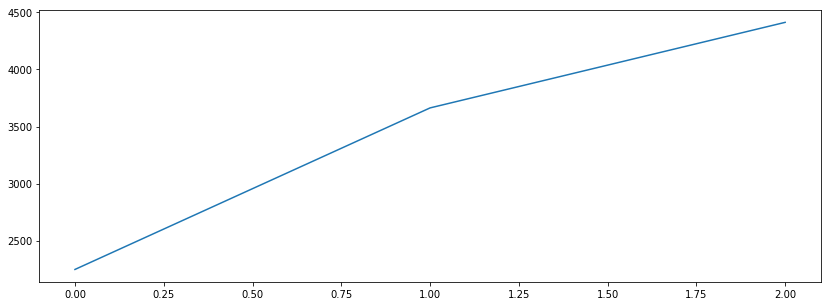

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(concat_df_labels.category.value_counts())
plt.show()

In [220]:
from numpy import zeros
embedding_dim = 300
vocabulary_size = 20000
embedding_matrix = zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [221]:
NUM_EPOCHS=15
BATCH_SIZE=8

## CNN + LSTM

In [222]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, LSTM
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=input_length, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 60, 300)           6000000   
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 300)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 56, 32)            48032     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                3264      
__________

In [223]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [224]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.hy')

Train on 5000 samples, validate on 4000 samples
Epoch 1/15
5000/5000 [==============================] - 14s 3ms/step - loss: 1.0806 - acc: 0.4646 - val_loss: 0.8335 - val_acc: 0.5835
Epoch 2/15
5000/5000 [==============================] - 12s 2ms/step - loss: 0.8908 - acc: 0.5566 - val_loss: 0.8810 - val_acc: 0.5258
Epoch 3/15
5000/5000 [==============================] - 12s 2ms/step - loss: 0.8448 - acc: 0.5830 - val_loss: 0.7930 - val_acc: 0.6190
Epoch 4/15
5000/5000 [==============================] - 12s 2ms/step - loss: 0.7964 - acc: 0.6226 - val_loss: 0.7539 - val_acc: 0.6130
Epoch 5/15
5000/5000 [==============================] - 13s 3ms/step - loss: 0.7609 - acc: 0.6522 - val_loss: 0.7448 - val_acc: 0.6232
Epoch 6/15
5000/5000 [==============================] - 13s 3ms/step - loss: 0.7508 - acc: 0.6494 - val_loss: 0.7796 - val_acc: 0.6268
Epoch 7/15
5000/5000 [==============================] - 14s 3ms/step - loss: 0.7240 - acc: 0.6668 - val_loss: 0.7150 - val_acc: 0.6635
Epoch 8

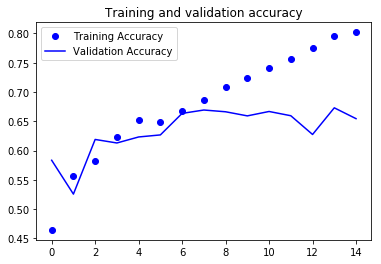

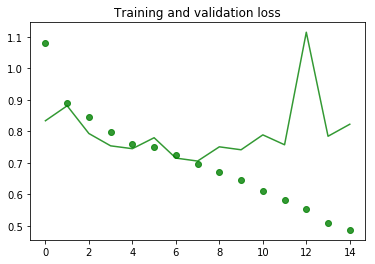

In [225]:
import matplotlib.pyplot as plt
    
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', alpha=0.8)
plt.plot(epochs, val_loss, 'g', alpha=0.8)
plt.title('Training and validation loss')
plt.show()

In [226]:
text_labels = ['fisico', 'no_fisico','otros']

In [227]:
y_pred = model.predict(x_test)
preds = y_pred.argmax(axis=1)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = preds.reshape(len(preds), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [228]:
concat_df_labels.category.value_counts()

2    4413
1    3663
0    2247
Name: category, dtype: int64

In [229]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(concat_df_labels['category'].values[-len(y_pred):], y_pred.argmax(axis=1))# , labels=text_labels)
print('*'*40)
print(cm)
print('*'*40)

****************************************
[[229  57   6]
 [ 80 306  71]
 [ 37 222 315]]
****************************************


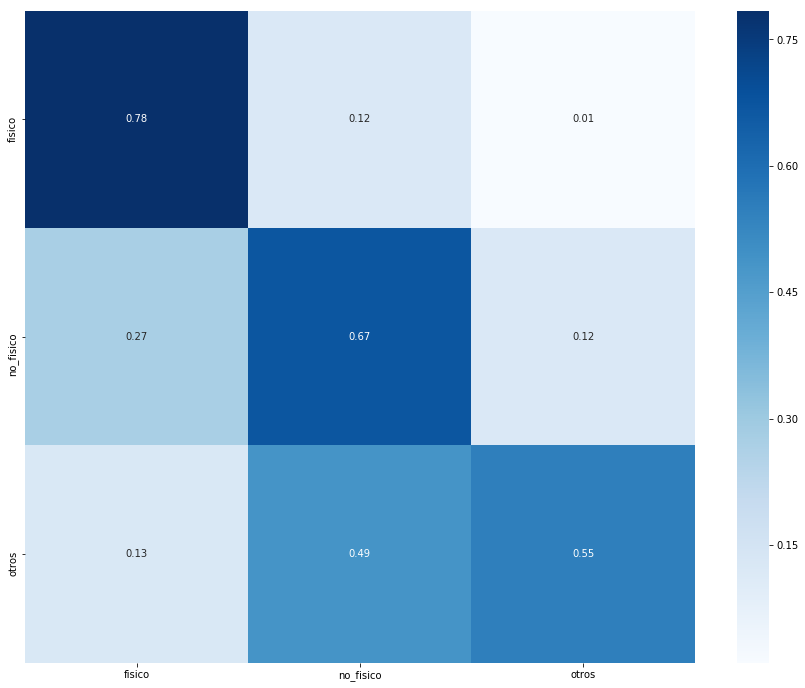

In [230]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cm / cm.sum(axis=1), annot=True, cmap='Blues')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)
plt.show()

In [231]:
df.full_text.count()

128396

In [232]:
df2 = df[~df.full_text.isna()]

In [233]:
df2.dtypes

country                                object
created_at                     datetime64[ns]
favorite_count                          int32
full_text                              object
id                                      int64
lat                                   float32
location                               object
lon                                   float32
parent_country                         object
parent_created_at              datetime64[ns]
parent_favorite_count                   int32
parent_full_text                       object
parent_id                               int64
parent_lat                            float32
parent_location                        object
parent_lon                            float32
parent_place                           object
parent_quote_count                      int32
parent_retweet_count                    int32
parent_time_zone                       object
parent_user_created_at         datetime64[ns]
parent_user_followers_count       

#### Let's evaluate with unseen observations

In [234]:
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(texts)
 
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(texts)
df2 = df[~df.full_text.isna()]
 
texts = df2['full_text'].values.tolist()
sequences = tokenizer.texts_to_sequences(texts)

print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

Found 24134 unique tokens.


In [235]:
y_preds = model.predict(data)
preds = y_preds.argmax(axis=1)

#cuéntalo una vez mi madre y yo tuvimos que defender una mujer que era agredida por su pareja, el quería dinero y iba muy bebido y ella embarazada...


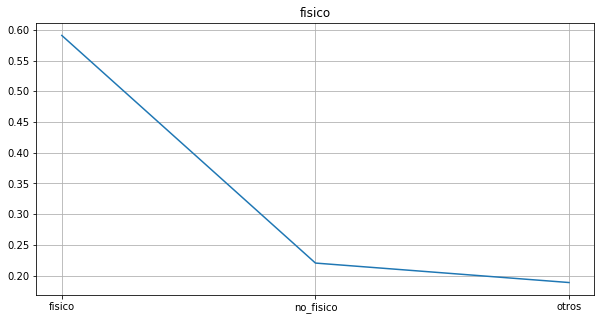

La primera vez que me acosaron en la calle, tenía 11 años y llevaba puesto el uniforme. Fue un taxista que me dijo: “uff mamasita, ya tendrás vellito en esa conchita”. Llegue a casa y me rompí en llanto, me sentía la persona más asquerosa del mundo #cuentalo


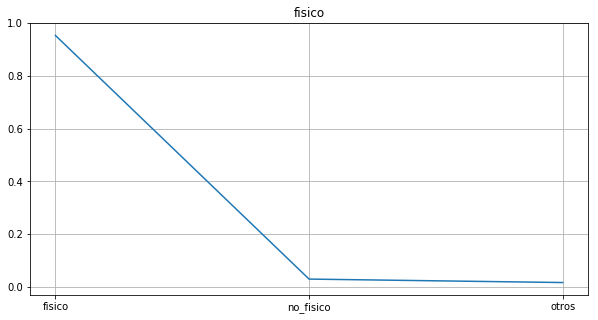

#Cuentalo
hace dos años, teniendo yo 16, fui a la feria de málaga con mis amigos, me cansé y quise irme a mi casa, y cuando me monté en el bus había un grupo de tres tíos borrachos que nada más verme empezaron a gritarme cosas +


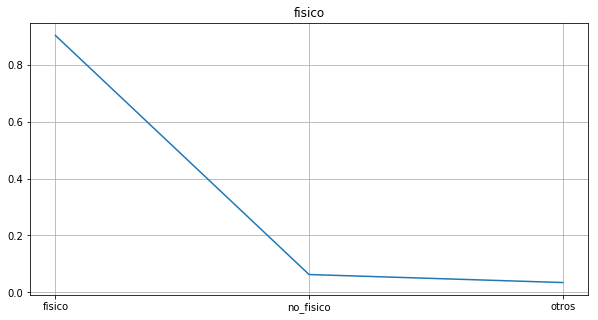

Con 16 años en el metro, dentro del vagon en hora punta con mucha gente,  un hombre mayor se sintio con derecho a toquetearme las piernas ya que llevaba pantalones cortos. Empece a gritarle: pero que estas haciendo!! Se abrieron las puertas del metro y se marcho. #Cuentalo


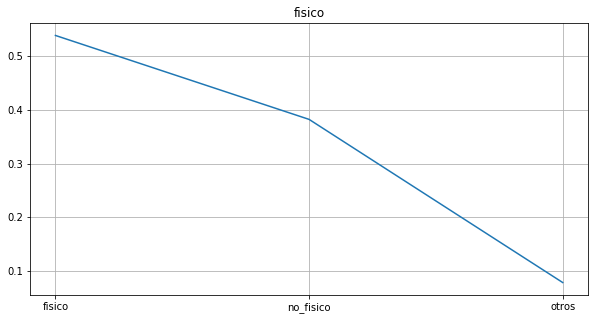

Empezar a conocer a alguien (amistad, amor lo que sea) y no dejar de pensar si no sera un tipo malo, no poder confiar en el ni nada. Es de lo peor. 
#cuentalo


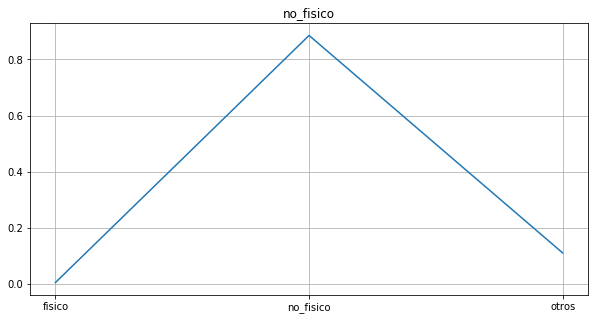

#YoSiTeCreoHermana porque sé lo que significa que no te crean. Que tu propia familia dude de tu testimonio solo porque la culpa no te dejó contarlo en su día. 
Mujer valiente: no te calles. 
#NoesNo #NoEstasSola #cuéntalo


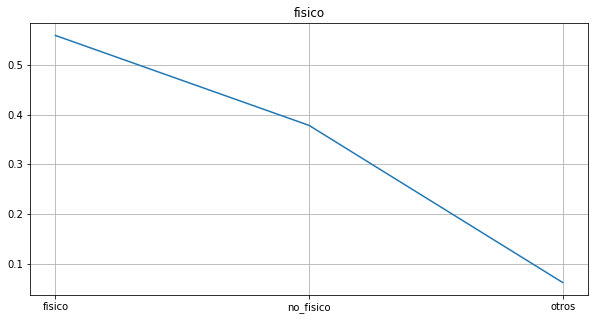

#Cuentalo volver sola casa despues una fantastica noche con los amig@s, ver a un hombre tocándose en un parque, seguidamente intente retenerte a la fuerza con una de las manos dentro de su pantalón....


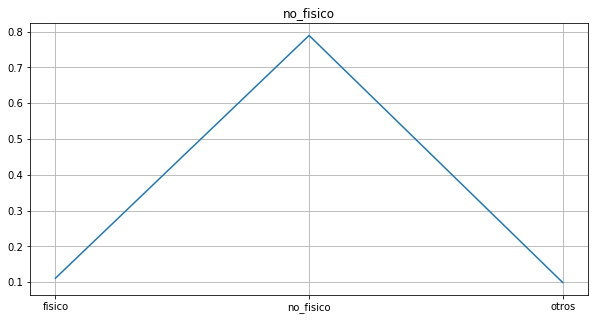

#LaManada #Cuentalo Han pedido que no se publique las fotos de estos violadores .Yo tampoco se lo que es un No como los cerdos estos  por eso la público #LaManada 👇 https://t.co/QKbcY98tRn


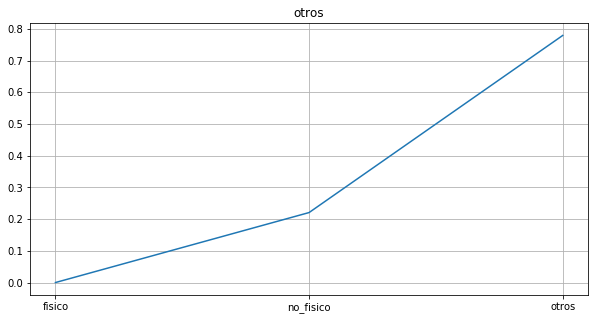

Hace unos meses atrás, al volver de la universidad sobre las 13h, adelanté andando a un padre y un hijo. Ellos me empezaron a preguntar mi nombre, a silbarme y a decirme barbaridades. 
Al ver que no les hacía caso, me siguieron hasta casi el portal de mi casa. 
#Cuentalo


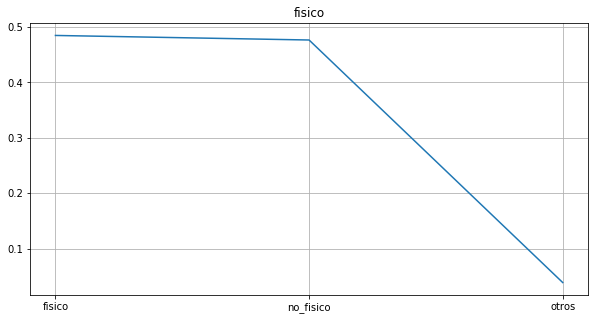

Todas esas veces en las que tuve que llamar a amigas para hablar con ellas mientras caminaba sola,todos esos coches con hombres que me pitaron o bajaron la ventanilla para decirme "piropos"... [1/3] #Cuéntalo


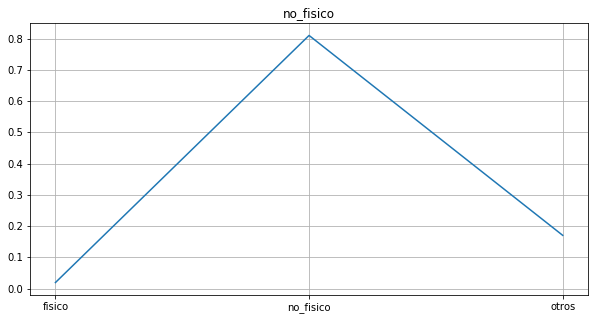

Esperar a que tu amiga entre en su portal para poder entrar al tuyo asegurandote de que no le pase nada, pegarte de espaldas a la puerta del ascensor para asegurarte que no hay nadie, entrar rapidamente y rezar por que no haya nadie indeseado en la puerta de tu casa. #Cuentalo


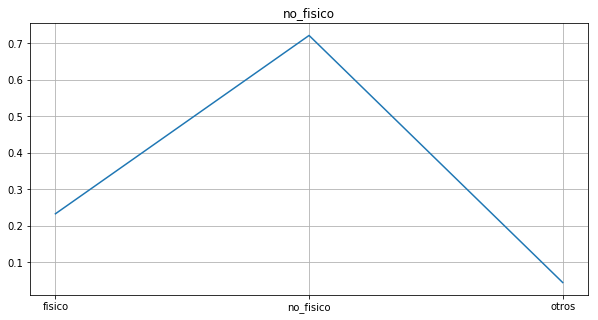

#cuéntalo cuando tenía 12 años un señor intentó asediarme y forzarme por suerte apareció mi hermana y me salvó


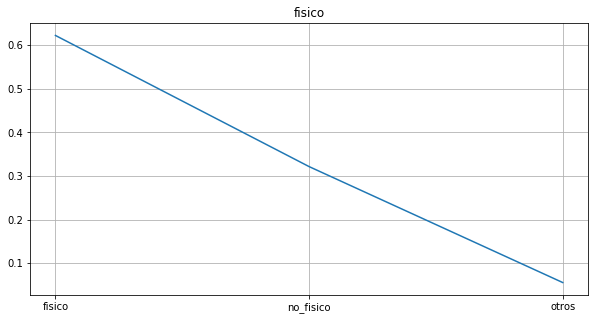

Que vuelco al corazón tener que leer tantas historias horribles sobre gente cercana o no.. Ojalá el ser humano evolucione como para dejar de hacer daño de esta manera.. Mucha fuerza para tod@s aquell@s valientes que por desgracia comparten sus experiencias en #Cuéntalo


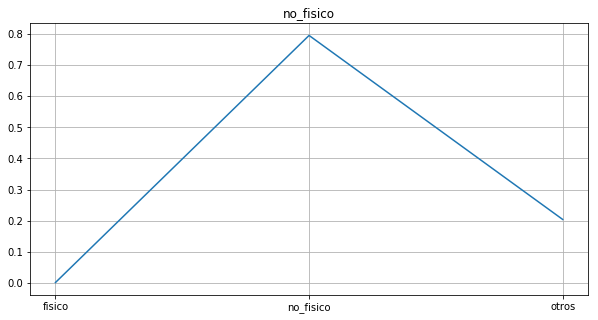

estaba con mi mejor amiga en un banco, tendriamos 6/7 años (hace bastante) se nos paro un tío delante y saco algo punzante, eramos pequeñas, no lo recordamos con claridad, pero salimos corriendo #Cuéntalo


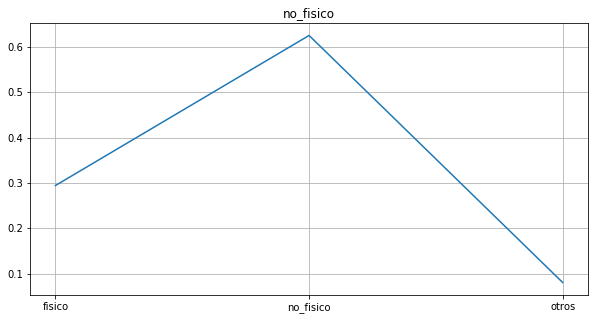

Sentir que alguien te está siguiendo, tranquilizarte al voltear y ver que es otra mujer #Cuentalo


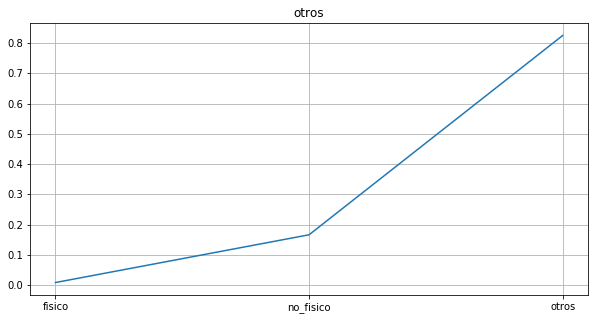

#Cuentalo en el año 1974 en los fastos franquistas llamado demostración sindical, manosear a las chicas era cosa de hombres, según un mando de falange, 200 chavales de entre 14 y 17 años, recibiamos ese mensaje, la mujer es para nuestro disfrute, por fortuna algunos evolucionamos


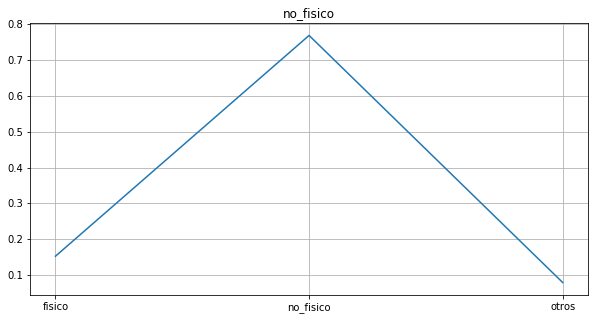

Que tu amiga te diga "avisa cuando llegues" por si te pasa algo por el camino #cuéntalo


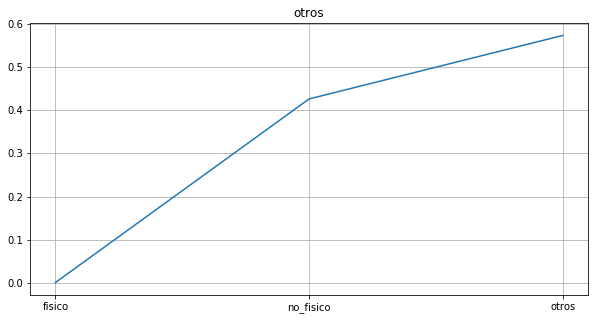

Me duelen todas las declaraciones como si fuera yo misma quien las ha vivido 💔 #Cuentalo


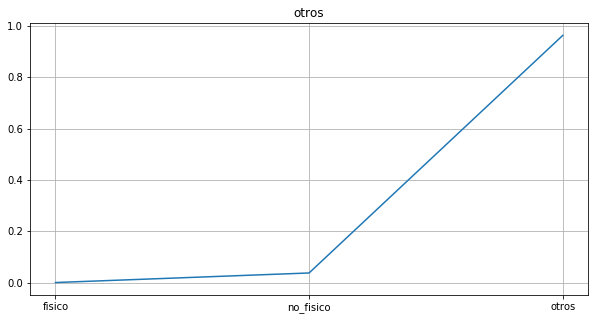

#Cuentalo Por favor si hay una, solo una mujer que no haya sufrido algún tipo de acoso que levante la mano...


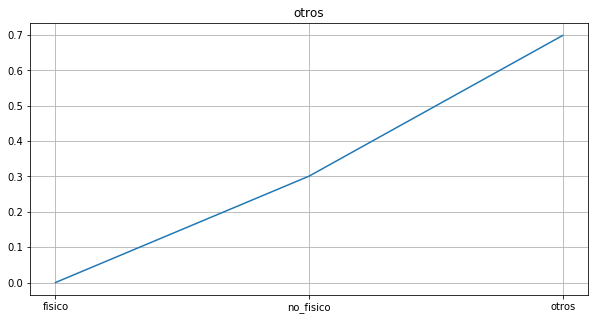

Entre más os leo, más asco me doy por ser hombre. #Cuéntalo


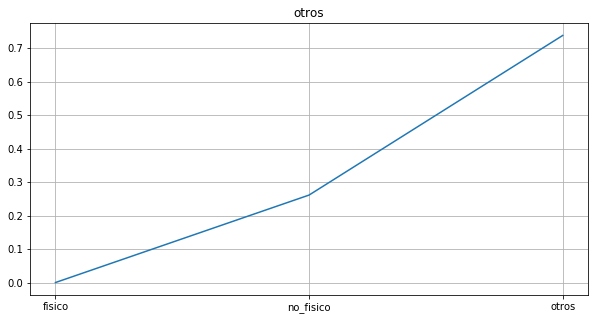

Es duro pero prácticamente todo lo que he contado hoy no lo sabía nadie hasta ahora.
#Cuéntalo


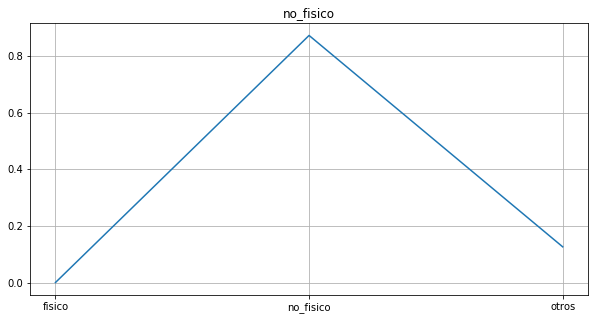

#Cuentalo: 
una noche volvía del #ave de #Atocha #Renfe desde Zaragoza, esperaba un #autobús de la #EMT, después de un largo día con viaje por trabajo incluido. Acabe cogiendo un #Taxi. Hilo va:


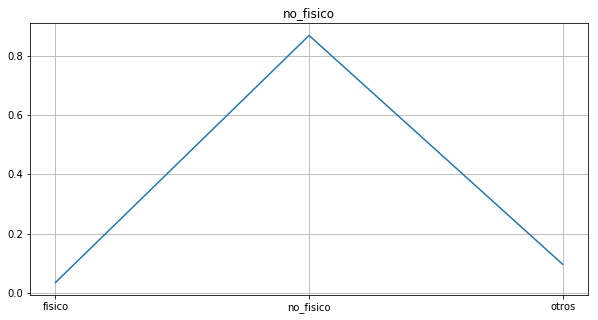

#Cuéntalo mi hermanastra 13 años, yo 11. Dando un paseo por Montjuic, de día. Tener que soportar a un tío masturbándose a nuestro lado dentro de un coche, siguiéndonos. Tener que pedir ayuda a un señor desconocido gritando desde lejos. No se borra la imagen de mi mente. Nunca.


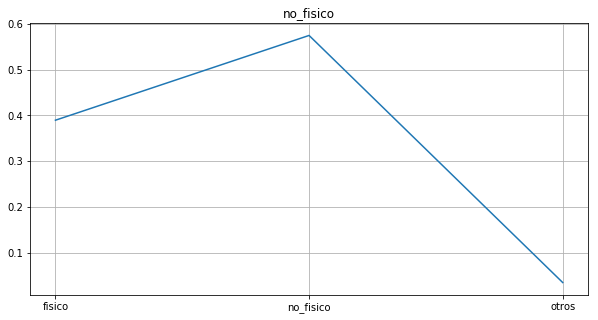

#cuentalo Quiero aclarar que mis amigos y parejas siempre me han tratado con respeto. Y estoy agradecida por conocer a tantos hombres buenos. Los que tenéis hijos varones, hacedme un favor: esforzaos mucho en educarlos y que cada vez sean menos los que nos tratan como a mercancía


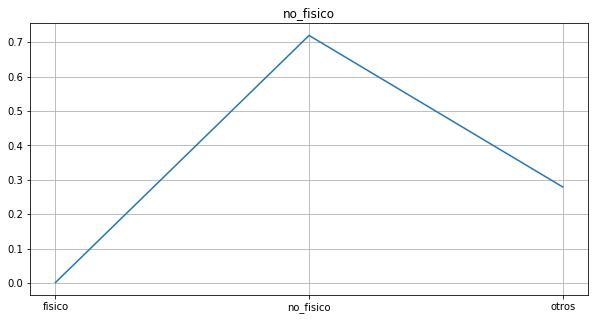

A veces me pregunto si los hombres que me hicieron daño en mi pasado, a día de hoy piensan que hicieron MAL y se arrepientan. #cuéntalo


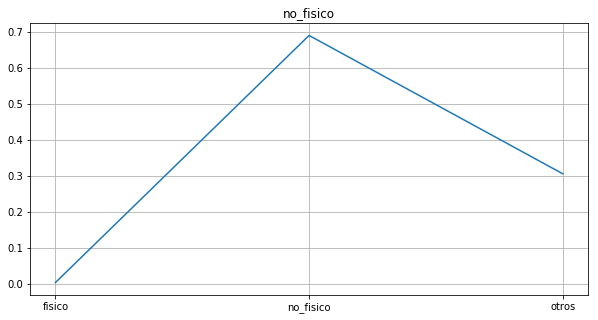

En una discoteca, bailando con mis amigas, un grupo de tios nos rodeó y uno me tocó el culo, le enfrenté y me llamó calientapollas, tuvimos que buscar a unos conocidos para que los otros tios nos dejaran en paz. En cuanto llegaron nuestros conocidos los tios se fueron. #cuentalo


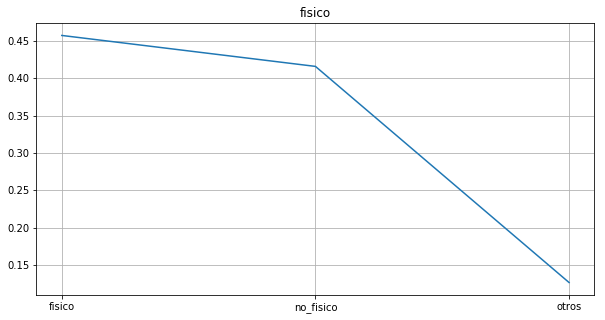

Con 18 pegué a un hombre que me sacaba 9 años cuando intentó tocarme. Por suerte sabía que abusaba de chicas jóvenes y menores y no quise ser la siguiente. #cuéntalo


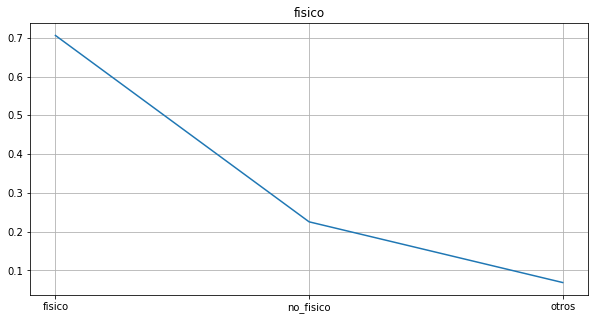

Dins del #cuentalo podríem incloure tots els maltractaments i dominació que alguns empren amb el "jo et protegiré (mentre siguis MEVA)" i et controlen tots els moviments perquè tu ets dèbil, i ells uns depredadors. DEPREDADORS


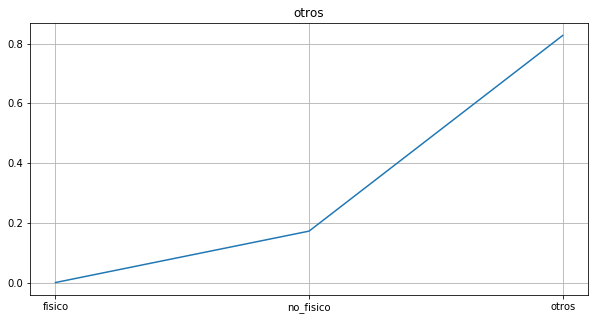

15 años. Mediodía. Un tipo pasa junto a mí en el portal. Cuando abro la puerta sale de una esquina y viene hacia mí con algo que parece un arma escondida en su cazadora. Consigo cerrar la puerta y subir corriendo. Aún lo paso mal cuando me acuerdo. #Cuéntalo


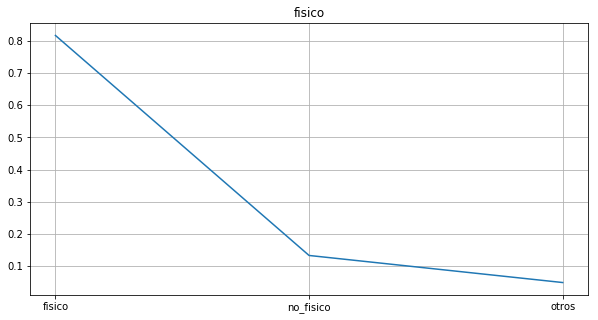

Me fui sola a casa tras salir de una discoteca
Un chico me perseguía,la calle solitaria.Le dije que m dejase en paz,que qué quería de mí. 
Él no m hacía caso y seguía detrás mía. 
No me hizo nada.Pero lo recuerdo y pienso
qué capacidad de decisión tengo,no puedo elegir?#cuéntalo


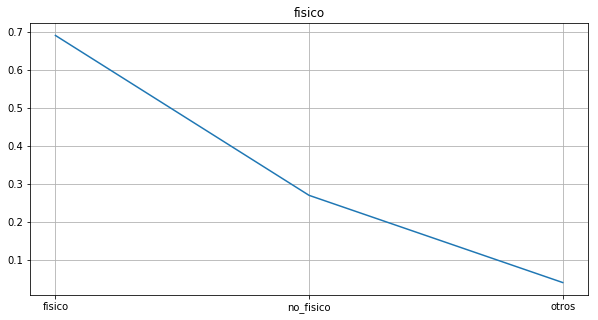

Trabajo en una tienda de ropa vi a unas niñas de unos 14 años que las seguía un hombre de unos 50 años... las escondí en el probador y las pregunté si querían llamar a alguien.. así mil historias, desgraciadamente el pan de cada día de todas las mujeres...#Cuentalo


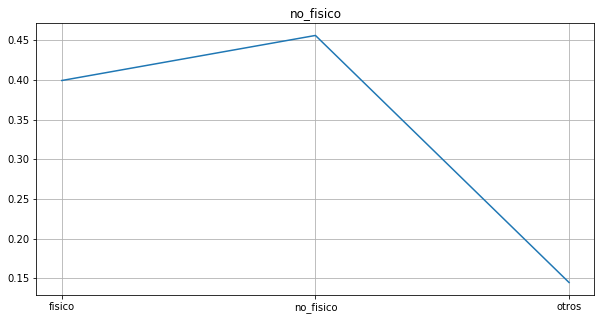

#Cuentalo Tomaba el sol boca abajo en la playa y 1 hombre con gorra y gafas de sol (mientras yo no me daba cuenta) se cascó una paja a un metro de mi. Asco.


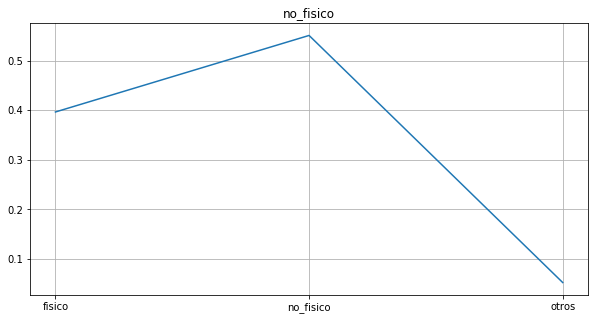

Tenia 6 añitos, abusaron sexualmente de ella hasta los 10, el 1er juicio por ser menor se le imputó 9 meses en la cárcel de menores, a dia de hoy después de 8 años esperan el 2° juicio x hacerlo siendo mayor de edad, una vergüenza pero aún sigue libre y ella tiene miedo #cuéntalo


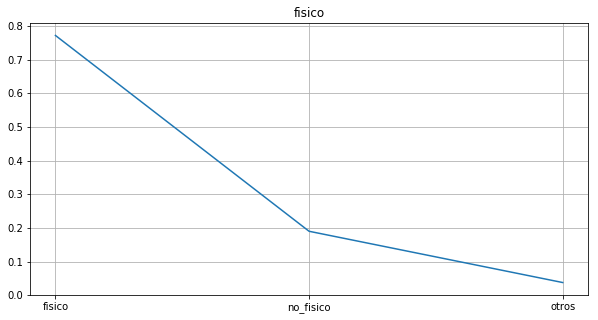

#cuéntalo me han seguido varias veces por la calle, pero uno  me siguió hasta el portal, pude cerrar la puerta y subí corriendo.
Se puso a llamar todos los timbres preguntando si había entrado una chica llorando y cuando llamó al mio mi madre dijo que llamaría la policía...


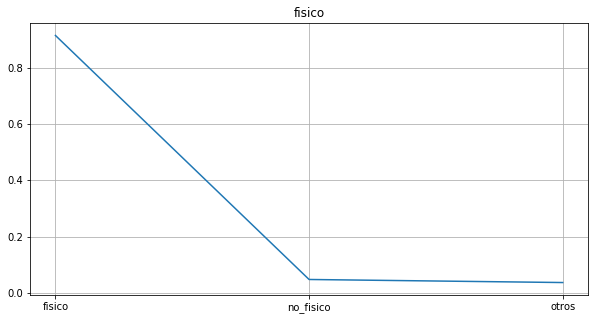

Qué te llamen puta porque si, porque parece un cumplido maravilloso cuando te acuestas con alguien... #Cuéntalo


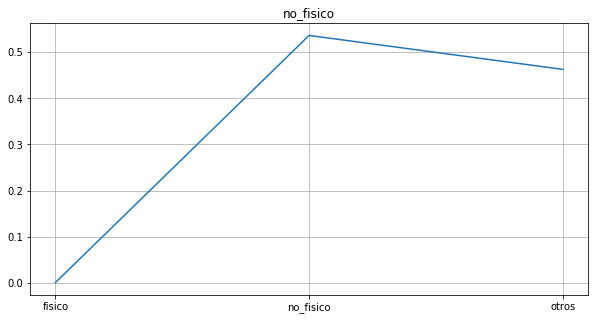

#Cuentalo Tendría 9 años estaba en la cola del Banco con mi madre y de repente un señor mayor me empieza a tocar el culo de una forma que me da asco recordarlo me quedé paralizada sólo podía agarrar la mano a mi madre. A día de hoy aún no lo sabe


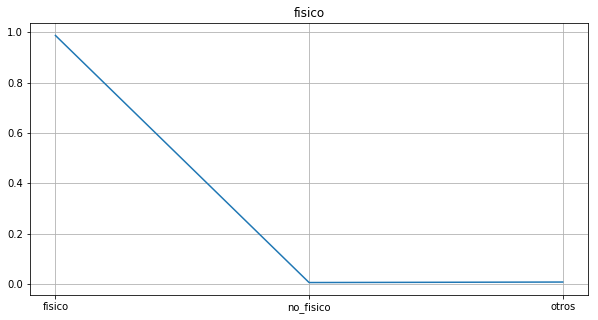

M'he emocionat llegint històries de #cuéntalo, se m'han remogut records i he sentit orgull de la valentia de tantes dones per explicar-ho. #Sororitat #ComandoScumJa


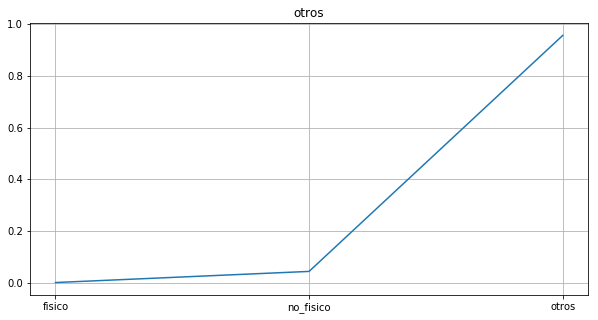

Sentirse afortunada al leer historias del #cuentalo porque POR SUERTE a ti no te han ocurrido debería ser innecesario.
Pero aquí estoy, dando gracias mentalmente por no sentirme identificada. Aunque con ciertos comportamientos y comentarios por la calle sí.


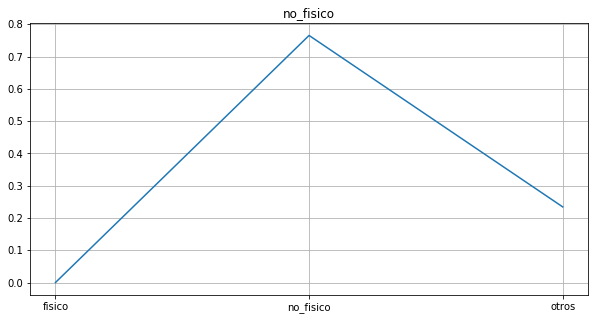

Propongo un #Admito a modo de apoyo al #Cuéntalo para que los hombres no nos dejen exponiéndonos y quedando en carne viva. Afmitid y contad vosotros con qué cosas de las que habéis leido os sentís interpelados por haberlas hecho. Bromas machistas, insistir en follar...


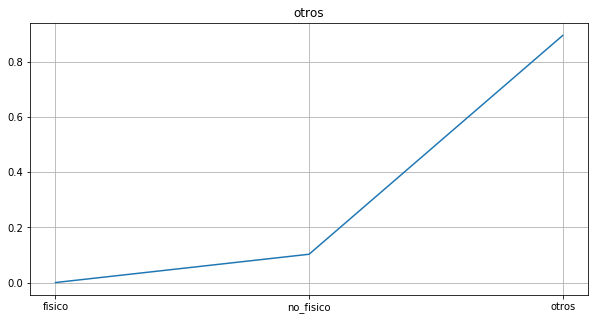

•he sentido miedo al volver a casa
•me han gritado por la calle diciéndome "piropos"
•le he dicho a una amiga que me mande un mensaje cuando llegue
•he tenido miedo de salir por la noche y al final no salí 
#Cuentalo


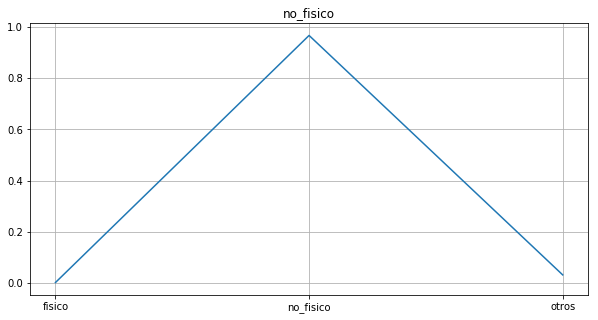

#Cuéntalo mi hermana a los 12 años más o menos fue perseguida por un hombre hasta mi casa, ella insegura subió por las escaleras en vez de por el ascensor. El hombre le siguió, cuando mi hermana se giró el le sacó una foto y salió corriendo.
Afortunadamente no Le pasó nada más.


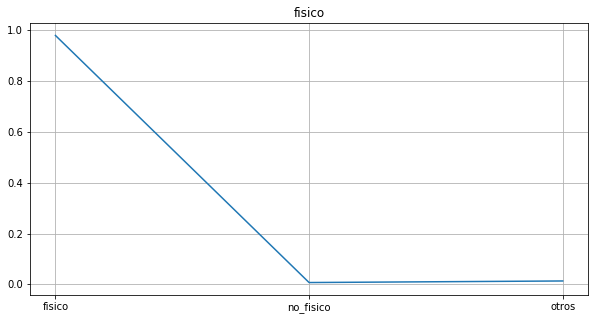

Leyendo vuestros #cuéntalo tengo ganas de abrazaros a todas.


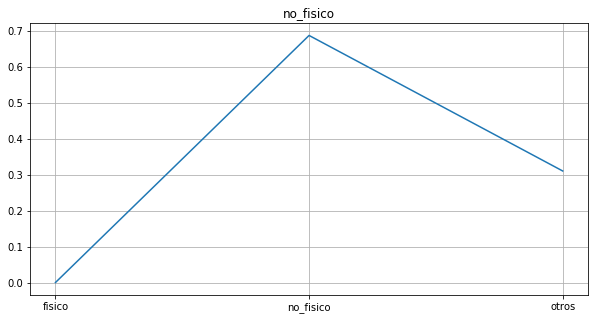

¿Os acordais del taxista Marroquí del ataque en las Ramblas? ¿El que se presto a dar viajes gratis a toda Barcelona? ¿El que se hizo heroe y protagonista de muchisimos testimonios en tuiter? Bueno. Pues. No se si os suena este.  #cuéntalo https://t.co/YMke8Je5wB


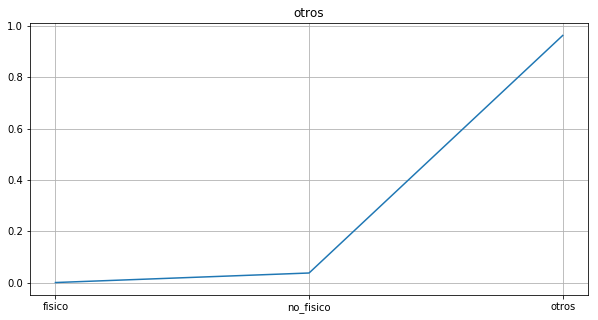

#Cuéntalo: las mujeres comparten sus historias de abusos y agresiones sexuales https://t.co/iy3VehSwD7 vía @verne


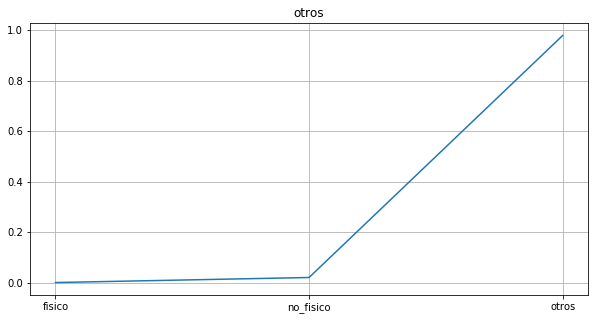

Hace 2 años el que consideraba mi mejor amigo me manoseo pensando que yo estaba dormida y por naturalizarlo y pensar que era mi amigo lo dejé pasar,  nunca dije nada. #cuentalo


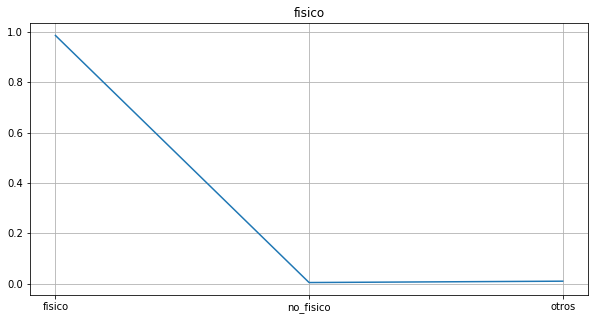

#cuéntalo Hace unos meses trabajando trabajando repartiendo flyers en la calle me mandaron ponerme en un sitio en el que había un hombre vendiendo cupones de la ONCE.


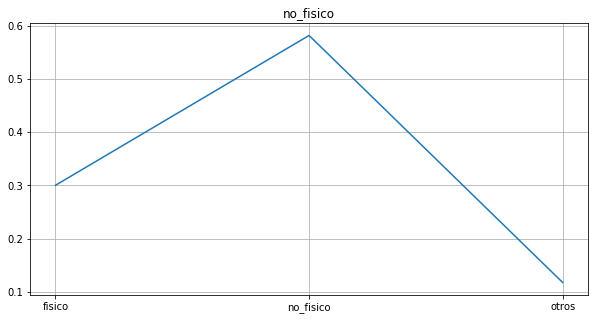

Campaña #micromachismos #soydejada #soysucia #Cuentalo #Cuentame @jelenuru @HuelgaFemRioja @HuelgaFeminista @Mujeres_enREBEL https://t.co/MCnwwpJwtn


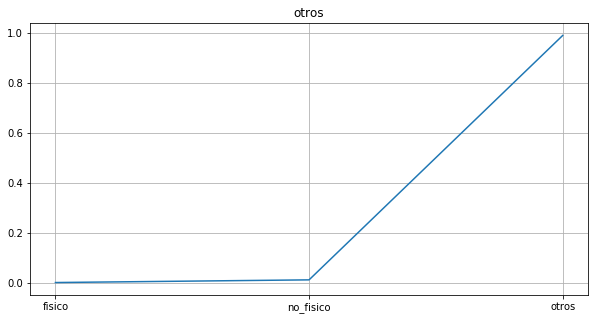

Al hilo de todo esto del hashtag #Cuentalo, voy a intentar explicar algo.
No soy especialmente miedosa. Nunca he sido agredida o abusada sexualmente. Incomodada sí, pero no agredida.
Y aún así tengo comportamientos que, si no tenemos en cuenta que soy mujer, no se explican. (1/n)


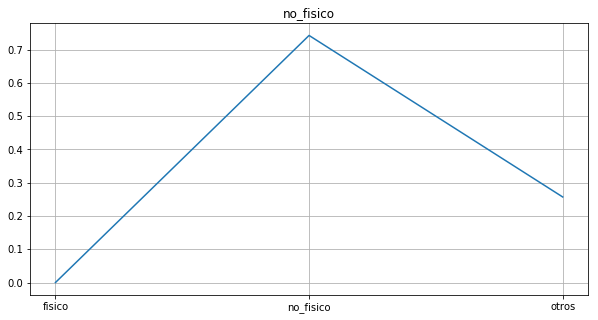

Por un problema médico, he pasado mi preadolescencia y adolescencia en manos de un hombre que ha manoseado  cada parte de mi cuerpo, diciéndome que lo solucionaría en cuestión de unos meses. No solucionó nada, yo me tragué sus comentarios machistas, y él mi seguridad #Cuentalo


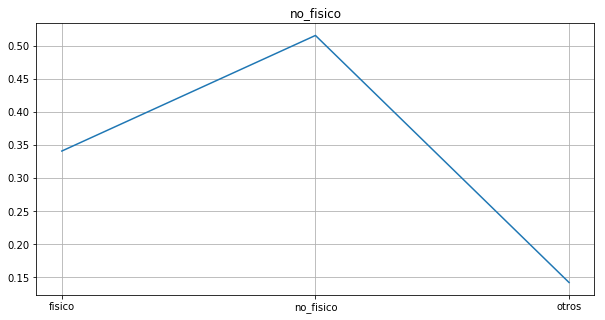

Me voy a la cama triste   pero al mismo tiempo contento por sentir la sororidad . Te tenéis mi apoyo. Junt@s construiremos una sociedad feminista. Venceremos a la masculinidad hegemónica. Gracias por no callaros. Yo os creo #Cuentalo


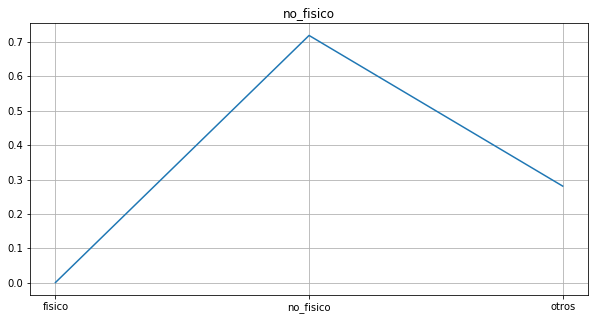

In [236]:
for i in range(500, 550):
    print(df2['full_text'].iloc[i])
    plt.figure(figsize=(10, 5))
    plt.plot(y_preds[i])
    plt.title(text_labels[y_preds[i].argmax()])
    plt.xticks(range(3), text_labels)
    plt.grid(True)
    plt.show()

In [237]:
df2.full_text.values[0]

'17 años.Vuelvo a casa con miedo. Se me acerca un chico poco más mayor que yo. Me dice que no tenga miedo que él me acompaña. Todo va bien, hasta que llegó cerca de mi portal y se me lanza a besarme sin motivo alguno.  Luego me sonríe y dice que para la próxima repetimos.#Cuentalo'

In [238]:
count = 0
for i in df2[1000:1100].iterrows():
    print('*' * 50)
    print(i[1]['full_text'])
    print('Classified as: {}'.format(text_labels[preds[count]]))
    print('*' * 50)
    count += 1

**************************************************
Cómo me duele este ht #cuéntalo
Classified as: fisico
**************************************************
**************************************************
Cuando tenía 7, un vecino de 17 se aprovechó sistemáticamente de mi durante varios meses y en diferentes situaciones. A los doce años fue la primera vez que pude hablar del tema, porque todo ese tiempo sentí que fue mi culpa, que me deje, me odiaba. Tenía 7 años. #cuéntalo
Classified as: otros
**************************************************
**************************************************
#Cuentalo quiero que seais libres, no valiente
Classified as: fisico
**************************************************
**************************************************
Un dia paseando por la calle pasé por un bar donde unos hombres me gritaron "ojala disfrutar de esas tetas".
#Cuentalo
Classified as: fisico
**************************************************
*********************************

In [239]:
score = model.evaluate(x_test, y_test,
                       batch_size=BATCH_SIZE, verbose=1)
 
print('Test accuracy:', score[1])

1323/1323 [==============================] - 1s 625us/step
Test accuracy: 0.6424792139303117


## Bidirectional LSTM

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, LSTM, Bidirectional
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=input_length, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

NUM_EPOCHS=15
BATCH_SIZE=32

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.hy')

import matplotlib.pyplot as plt
    
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', alpha=0.8)
plt.plot(epochs, val_loss, 'g', alpha=0.8)
plt.title('Training and validation loss')
plt.show()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(concat_df_labels['category'].values[-len(y_pred):], y_pred.argmax(axis=1))#, labels=text_labels)
print('*'*40)
print(cm)
print('*'*40)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm, cmap='Reds')
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax, )
ax.set_xticklabels(text_labels)
ax.set_yticklabels(text_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cm / cm.sum(axis=1), annot=True, cmap='Blues')
ax.xaxis.set_label_position('top')
ax.set_xticklabels(text_labels)
ax.set_yticklabels(text_labels)
plt.show()

In [241]:
score = model.evaluate(x_test, y_test,
                       batch_size=BATCH_SIZE, verbose=1)
 
print('Test accuracy:', score[1])

1323/1323 [==============================] - 1s 553us/step
Test accuracy: 0.6424792139303117


In [242]:
all_preds = model.predict_proba(data)
all_preds


array([[5.08616865e-01, 4.35762435e-01, 5.56207150e-02],
       [3.61540180e-04, 1.76511835e-02, 9.81987298e-01],
       [6.14123046e-01, 2.07958430e-01, 1.77918509e-01],
       ...,
       [6.47007619e-05, 3.61927420e-01, 6.38007879e-01],
       [2.71211704e-03, 1.14278436e-01, 8.83009434e-01],
       [3.94636183e-04, 6.99792325e-01, 2.99813032e-01]], dtype=float32)

In [243]:
from pandas import DataFrame

df_preds = DataFrame(all_preds, index=df2.index, columns=['pred_fisico', 'pred_no_fisico', 'pred_otros'])
df_preds.head()

,pred_fisico,pred_no_fisico,pred_otros
tweet_id,,,
990380122082611200,0.508617,0.435762,0.055621
990380024703447040,0.000362,0.017651,0.981987
990380009549434882,0.614123,0.207958,0.177919
990380001202761728,0.851931,0.106932,0.041136
990379986564669441,0.000058,0.517896,0.482046


In [244]:
df_preds.to_csv('df_only_preds_what_2.csv')

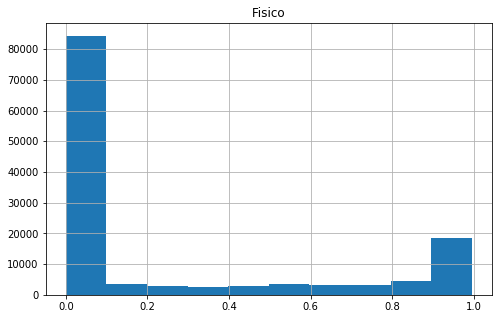

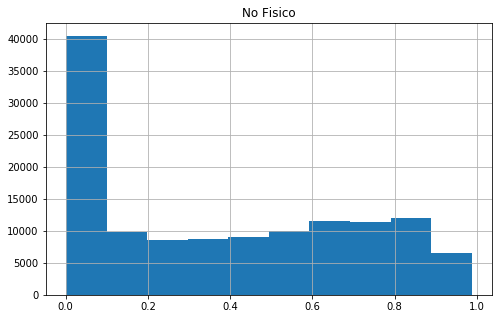

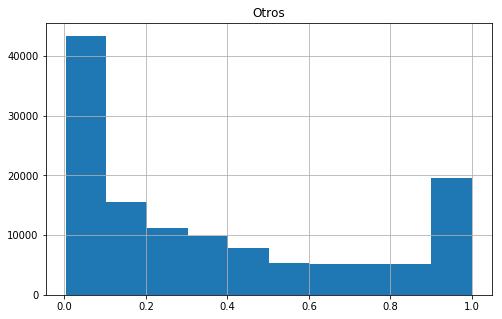

In [245]:
plt.figure(figsize=(8, 5))
df_preds.pred_fisico.hist()
plt.title('Fisico')
plt.show()


plt.figure(figsize=(8, 5))
df_preds.pred_no_fisico.hist()
plt.title('No Fisico')
plt.show()

plt.figure(figsize=(8, 5))
df_preds.pred_otros.hist()
plt.title('Otros')
plt.show()

In [169]:
df_preds.shape

(160470, 3)

In [118]:
df_preds['id'] = df2['id']

In [171]:
concat([df2, df_preds], axis=1).to_csv('df_predicted_probs8.csv')

In [173]:
from pandas import read_csv

df2 = read_csv('df_predicted_probs7.csv')
df1 = read_csv('df_predicted_probs8.csv')

dddfff = concat([df2, df1[['pred_fisico', 'pred_no_fisico', 'pred_otros']]], axis=1)

/Users/fserra/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,3,6,8,11,16,20,26,28,30,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [174]:
dddfff.to_csv('df_predicted_probs_originals_3.csv')